Written by Kristoffer Rakstad Solberg
Summer Intern, AKBM Transformation
2019

### Import libraries

In [1]:
"""
Written by Kristoffer Rakstad Solberg
Summer Intern, AKBM Transformation
2019
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from utils.load_catch_from_bigquery import load_BQ_and_clean

### Functions for filtering dataset

In [2]:
def filter_catch(df):
    
    # remove NULL rows
    df = df[df['Total catch Krill - Mt'].notnull()]
    df = df[df['Baric pressure (hPa)'].notnull()]
    df = df[df['Water temp (Celsius)'].notnull()]
    df = df[df['Krill Size (mm)'].notnull()]
    df = df[df['Wind speed (kn)'].notnull()]
    df = df[df['Krill weight (gram)'].notnull()]
    #df = df[df['FishingCondition'].notnull()]
        
        
    df.loc[(df['FishingCondition'].isnull()) & (df['Total catch Krill - Mt'] > 500), ['FishingCondition']] = 'Good fishing' 
    df.loc[(df['FishingCondition'].isnull()) & (df['Total catch Krill - Mt'] < 501), ['FishingCondition']] = 'Bad fishing' 
    
    # Make fishing condition a binary value
    df.loc[df['FishingCondition'] == 'No fishing', ['FishingCondition']] = 'Bad fishing'
    conditions = pd.get_dummies(df['FishingCondition'], drop_first=True)
    df = pd.concat([df,conditions],axis=1)
    
    # 
    areas = pd.get_dummies(df['Area'], drop_first=False)
    df = pd.concat([df,areas],axis=1)
    
    # Drop unneccesary columns
    df = df.drop(columns=['Total Krill Meal Kg', 'Trawl depth (m)', 'TripNumber', 'Comments',
                          'Position','Vessel','Wind direction','ReasonForNoOrBadFishing'])

    
    return df

### Extract the dataframe

In [3]:
%%time
if __name__ == '__main__':
    # Get data
    df = load_BQ_and_clean()

Establishing connection to BigQuery in GCP.
    SUCCESS: Connection to BigQuery in GCP established.
Extracting catch data from 2010 to October 2018.
Extracting catch data from December 2018 onwards.
Merging and cleaning catch data
DONE after 9.22sec: Data extracted, merged and cleaned.
Wall time: 9.27 s


In [4]:
df.head()

,Vessel,Date,Total catch Krill - Mt,Total Krill Meal Kg,Position,Area,Trawl depth (m),Baric pressure (hPa),Water temp (Celsius),Krill Size (mm),Krill weight (gram),Comments,TripNumber,Wind direction,Wind speed (kn),FishingCondition,ReasonForNoOrBadFishing,Latitude,Longitude
0,Saga Sea,2010-01-14,356.15,35750.0,60°19 S 46°38 W,,NaN,NaN,NaN,43.3,0.69,,NaN,None,NaN,NaN,NaN,-60.316667,-46.633333
1,Saga Sea,2010-01-15,227.77,32250.0,60°24 S 46°38 W,,NaN,NaN,NaN,43.9,0.78,,NaN,None,NaN,NaN,NaN,-60.400000,-46.633333
2,Saga Sea,2010-01-16,439.06,58750.0,60°23 S 46°39 W,,NaN,NaN,NaN,43.4,0.75,,NaN,None,NaN,NaN,NaN,-60.383333,-46.650000
3,Saga Sea,2010-01-17,755.75,90000.0,60°25 S 46°40 W,,NaN,NaN,NaN,47.2,0.95,,NaN,None,NaN,NaN,NaN,-60.416667,-46.666667
4,Saga Sea,2010-01-18,406.26,62100.0,60°27 S 46°36 W,,NaN,NaN,NaN,41.8,0.55,,NaN,None,NaN,NaN,NaN,-60.450000,-46.600000


## Exploratory Data Analysis (EDA)

### Missing data

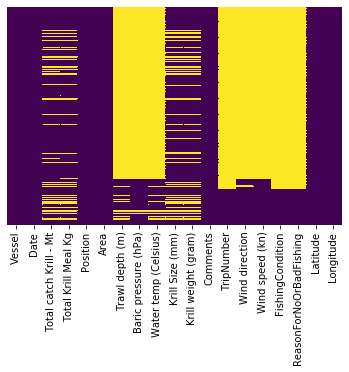

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Check data correlation

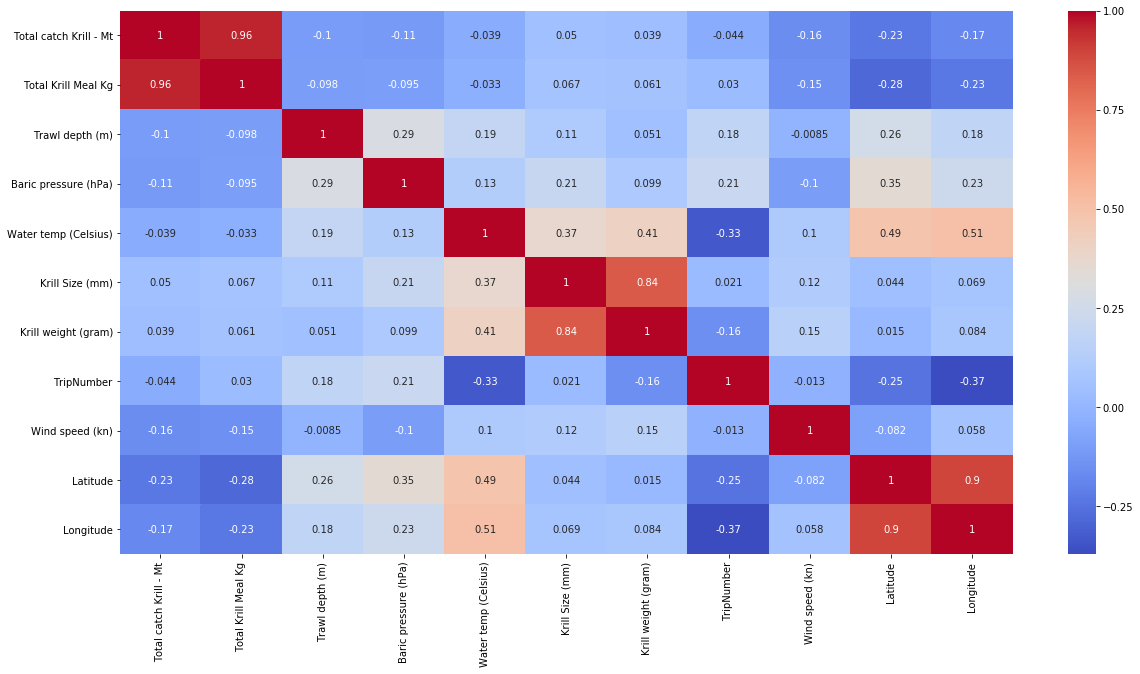

In [6]:
#sns.jointplot(x='Baric pressure (hPa)',y='Krill Size (mm)',data=df,kind='reg')
plt.figure(figsize = (20,10))
ax = sns.heatmap(df.corr(method='pearson'),cmap='coolwarm',annot=True)

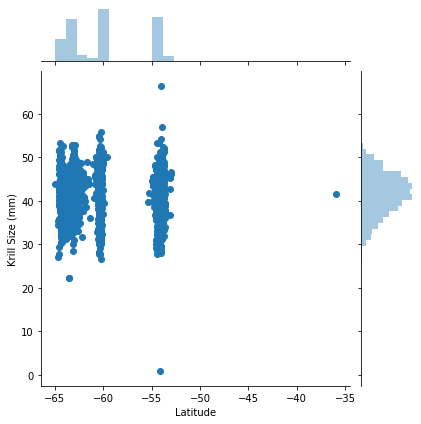

In [7]:
sns.jointplot(x='Latitude',y='Krill Size (mm)',data=df)

### Filter Data

Remove all NULL rows

In [8]:
# remove bad rows
df = filter_catch(df)

# create month
df['month'] = df['Date'].dt.month
    
# re-index
df.index = pd.RangeIndex(len(df.index))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
Date                      596 non-null datetime64[ns]
Total catch Krill - Mt    596 non-null float64
Area                      596 non-null object
Baric pressure (hPa)      596 non-null float64
Water temp (Celsius)      596 non-null float64
Krill Size (mm)           596 non-null float64
Krill weight (gram)       596 non-null float64
Wind speed (kn)           596 non-null float64
FishingCondition          596 non-null object
Latitude                  596 non-null float64
Longitude                 596 non-null float64
Good fishing              596 non-null uint8
48.1                      596 non-null uint8
48.2                      596 non-null uint8
48.3                      596 non-null uint8
month                     596 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(1), object(2), uint8(4)
memory usage: 58.3+ KB


In [10]:
df.head()

,Date,Total catch Krill - Mt,Area,Baric pressure (hPa),Water temp (Celsius),Krill Size (mm),Krill weight (gram),Wind speed (kn),FishingCondition,Latitude,Longitude,Good fishing,48.1,48.2,48.3,month
0,2018-05-06,93.89,48.1,992.0,0.7,39.67,0.41,6.0,Bad fishing,-64.333333,-61.300000,0,1,0,0,5
1,2018-05-07,552.47,48.1,983.0,0.5,38.58,0.35,25.0,Good fishing,-64.350000,-61.300000,1,1,0,0,5
2,2018-05-10,530.02,48.1,997.0,0.5,38.42,0.38,10.0,Good fishing,-64.233333,-61.050000,1,1,0,0,5
3,2018-05-11,716.33,48.1,999.0,0.7,38.49,0.39,6.0,Good fishing,-64.250000,-61.083333,1,1,0,0,5
4,2018-05-14,352.86,48.1,996.0,0.5,37.68,0.36,35.0,Bad fishing,-64.283333,-61.516667,0,1,0,0,5


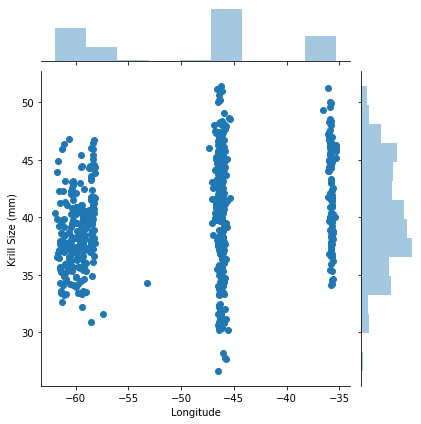

In [11]:
sns.jointplot(x='Longitude',y='Krill Size (mm)',data=df)

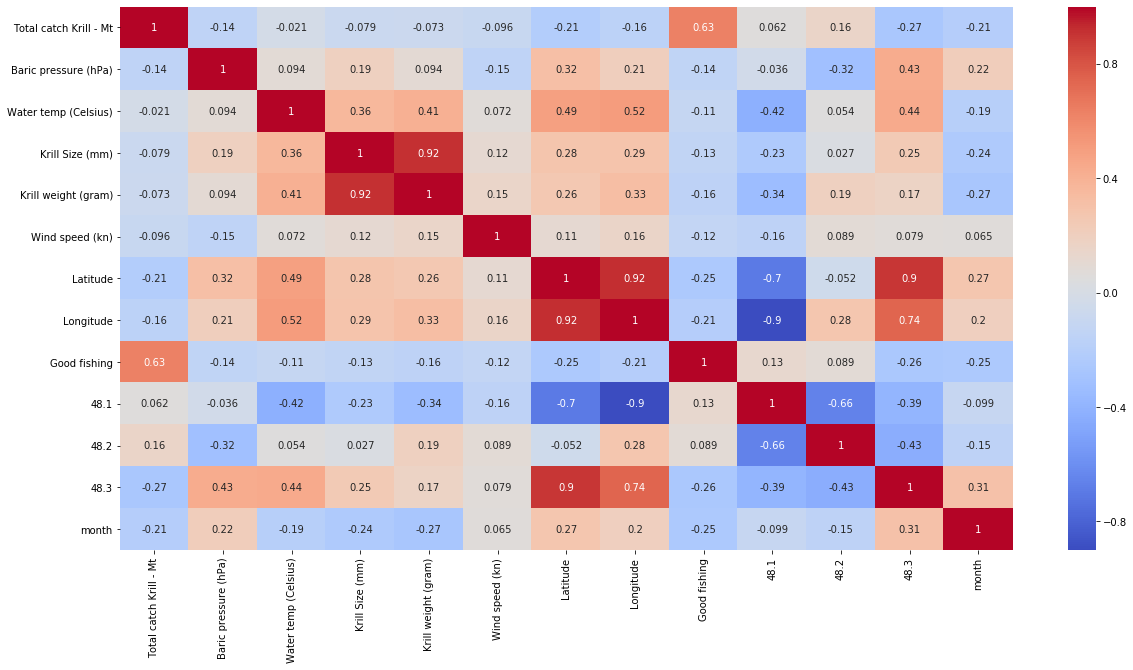

In [12]:
#sns.jointplot(x='Baric pressure (hPa)',y='Krill Size (mm)',data=df,kind='reg')
plt.figure(figsize = (20,10))
ax = sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
#figure = ax.get_figure()    
#figure.savefig('corr_heatmap.eps')

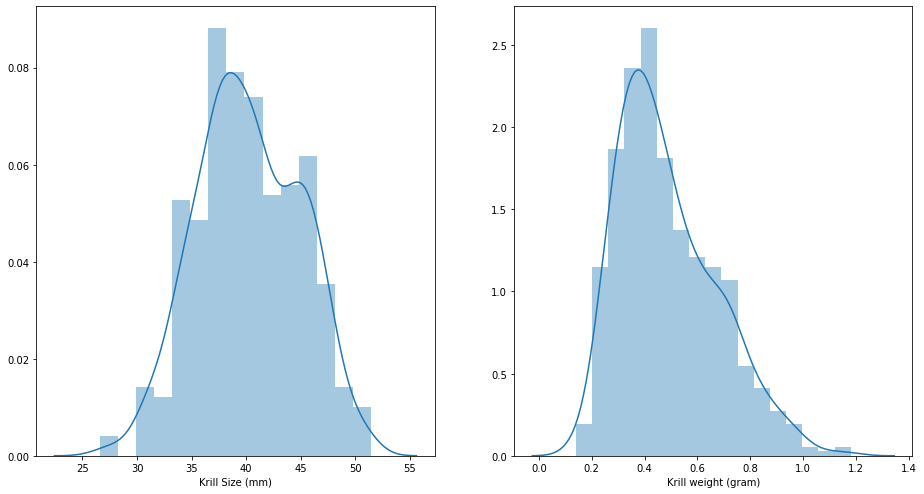

In [13]:
a4_dims = (15.7, 8.27)
f, axes = plt.subplots(1, 2, figsize=a4_dims)
sns.distplot(df['Krill Size (mm)'], ax = axes[0])
sns.distplot(df['Krill weight (gram)'], ax = axes[1])

## Training a Multiple Polynomial Features Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

https://www.theaispace.com/blog/Polynomial-Regression

**Theory**

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing **polynomial features** from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_{1}^2 + \theta_5 x_{2}^2 $$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new set of features

$$ z = [x_1,x_2, x_1 x_2, x_{1}^2, x_{2}^2] $$

With this re-labeling of the data, our problem can be written

$$ \hat{y}(w,z) = \theta_0 + \theta_1 z_1 + \theta_2 z_2 + \theta_3 z_3 + \theta_4 z_4 + \theta_5 z_5 $$

We see that the resulting polynomial regression is in the same class of linear models we considered above (i.e. the model is linear in ) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

Source: https://scikit-learn.org/stable/modules/linear_model.html

### X and y arrays

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
Date                      596 non-null datetime64[ns]
Total catch Krill - Mt    596 non-null float64
Area                      596 non-null object
Baric pressure (hPa)      596 non-null float64
Water temp (Celsius)      596 non-null float64
Krill Size (mm)           596 non-null float64
Krill weight (gram)       596 non-null float64
Wind speed (kn)           596 non-null float64
FishingCondition          596 non-null object
Latitude                  596 non-null float64
Longitude                 596 non-null float64
Good fishing              596 non-null uint8
48.1                      596 non-null uint8
48.2                      596 non-null uint8
48.3                      596 non-null uint8
month                     596 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(1), object(2), uint8(4)
memory usage: 58.3+ KB


In [28]:
# Features
data = df[['Baric pressure (hPa)', 'Water temp (Celsius)','Wind speed (kn)','month', 'Longitude', 'Latitude']]
#data = df[['Baric pressure (hPa)', 'Water temp (Celsius)','Wind speed (kn)','month', 'Longitude', 'Latitude', 'Krill weight (gram)']]
#data = df[['Baric pressure (hPa)', 'Water temp (Celsius)','Wind speed (kn)','month', '48.1', '48.2','48.3']]
#data = df[['Baric pressure (hPa)', 'Water temp (Celsius)','month', 'Longitude', 'Latitude']]
#data = df[['Baric pressure (hPa)', 'Water temp (Celsius)','Wind speed (kn)','month']]
#data = df[['Longitude', 'Latitude', 'month']]

# Target variable
y = df['Krill Size (mm)']

## Train Test Split
We have to split our dataset into a training part and a test part

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

PolynomialFeatures doesn't do a polynomial fit, it just transforms your initial variables to higher order.
For creating features we create a PolynomialFeatures instance, specify a degree, and instead of fitting, we fit_transform (don't let the name confuse you, it doesn't actually do any sort of fitting). We save the results as our new X:

In [97]:
features = PolynomialFeatures(degree=2, interaction_only=False)

# No standardization applied
X = features.fit_transform(data)

PolynomialFeatures creates more than just the squares. It also creates interaction terms. For example, let's say we had two features, X and Z.  PolynomialFeatures creates X² and Z² but it also creates 1 (this is for the intercept) and X*Z, and it also returns X and Z themselves. From the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
These interaction terms usually increase model performance significantly (even if they don't have any relationship with Y, in which case they will just be dropped by the model by getting low coefficients). Let's create a new model and fit it:

In [98]:
print(data.shape)
print(X.shape)

(596, 6)
(596, 28)


In [102]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

## Creating and Training the Model
Here we do the actual fitting in accordance to linear regression

In [103]:
# Everything here should also look familiar
# We transform the polynomial expression to a linear expression through variable change
full_polynomial_model = LinearRegression(fit_intercept=True, normalize=True)

full_polynomial_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

## Model Evaluation

We evaluate the model by checking out it's coefficients and how we can interpret them.
In mathematical notation, if $ \hat{y} $ is the predicted value.

$$ \hat{y} = (w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Across the module, we designate the vector $ w = (w_1, ..., w_p) $ as *coeff_* and $ w_0 $ as *intercept_* 

In [104]:
# print the intercept
print(full_polynomial_model.coef_)
print(full_polynomial_model.intercept_)
print("The training model explains {:.2f}% of the krill size.".format(full_polynomial_model.score(X_train,y_train)*100))
print("The test model explains {:.2f}% of the krill size.".format(full_polynomial_model.score(X_test,y_test)*100))

[ 8.16465567e-11 -3.70627670e-02  2.59092547e+01 -3.75031530e-02
  2.61584570e+01 -1.39259756e+01  8.29258000e+00 -7.19743806e-05
 -2.66706734e-02 -1.24028224e-05 -7.73800417e-03  5.43569626e-03
 -8.19175077e-03  7.06814766e-01 -2.73645666e-02 -2.65805470e-02
  1.13550535e-01 -1.36385238e-01  1.27512605e-03  1.41336368e-03
  1.99514167e-03 -1.37500888e-03 -3.85642509e-01 -2.71282167e-02
  2.52017811e-01  2.65598465e-02 -1.98678165e-01  1.02755089e-01]
-118.60058920332258
The training model explains 57.40% of the krill size.
The test model explains 53.09% of the krill size.


It's easy to see that as we increase to polynomials of higher order (x³,x⁴, etc), the accuracy of our predictions rise. In fact, using 3rd degree polynomial features gets us to an R² of 1, or 100%. This is what we call overfitting. The model doesn't find the relationship in the data, but instead "memorizes" the mapping from X to Y. This defeats the purpose because given a new data point, the model will almost certainly predict it wrong.

When modeling we usually split the data in two or three sets (training and testing, or training, validation, and testing). We train on one, evaluate on the other, and if we have a third we keep it till much later only for final evaluation purposes. 

## Predictions from our Model 
We're now able to evaluate how well our Model is trained

In [51]:
predictions= full_polynomial_model.predict(X_test)

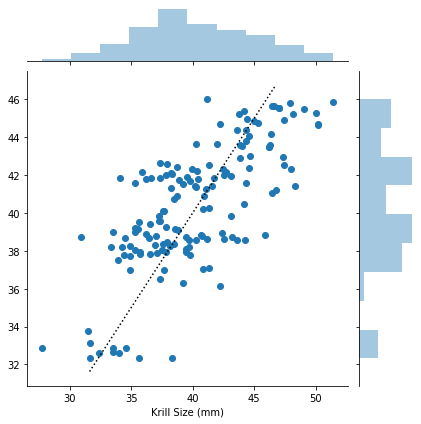

In [52]:
g = sns.jointplot(x=y_test,y=predictions,kind='scatter')
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')   
#plt.xlabel('Y Test')
#plt.ylabel('Predicted')

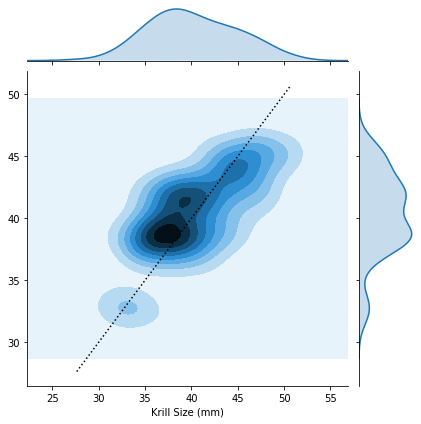

In [53]:
# Predictions along y-axis, ground truth along x-axis
g = sns.jointplot(x=y_test,y=predictions,kind='kde')
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')  
#g.savefig('size_jointplot_linear.eps')

### Residual Histogram
If your residuals are normally distributed, it means your model is a
correct choice for the data. In this case our model uses a linear regression model

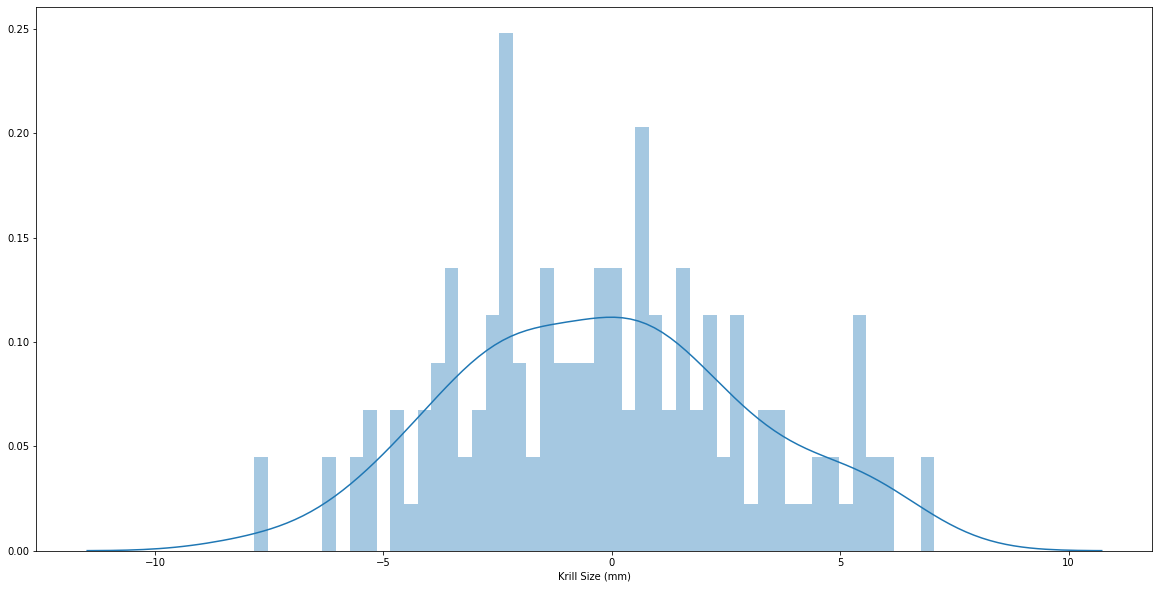

In [54]:
plt.figure(figsize = (20,10))
ax = sns.distplot((y_test-predictions),bins=50);

#ax.axes.set_title("Residual Histogram",fontsize=50)
#ax.set_xlabel("Krill Size (mm)",fontsize=30)
#ax.set_ylabel("Kernel Density",fontsize=30)

#figure = ax.get_figure()    
#figure.savefig('residuals_png.png', transparent=True)
#figure.savefig('residuals_eps.eps', transparent=True)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [47]:
from sklearn import metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("The training model explains {:.2f}% of the krill size.".format(full_polynomial_model.score(X_train,y_train)*100))
print("The test model explains {:.2f}% of the krill size.".format(full_polynomial_model.score(X_test,y_test)*100))

MAE: 2.596964106757743
MSE: 10.200889595188588
RMSE: 3.1938831530268272
The training model explains 57.40% of the krill size.
The test model explains 53.09% of the krill size.


This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, for example :

- **Need more data:** We need to have a huge amount of data to get the best possible prediction. 

- **Bad assumptions:** We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
- **Poor features:** The features we used may not have had a high enough correlation to the values we were trying to predict.